In [25]:
#随机森林分类
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#聚类数据生成器，可创造100个类1000个样本，每个样本10个特征
X,y = make_blobs(n_samples = 1000,n_features = 10,centers = 100,random_state = 0)

In [27]:
#燕尾花数据集
iris  = load_iris()
print(iris['target'].shape)

(150,)


In [28]:
#随机森林分类器
rf1 = RandomForestClassifier() #默认参数
rf2 = RandomForestClassifier(n_estimators = 10,max_depth= None,min_samples_split=3,random_state = 0)
rf1.fit(iris.data[:130],iris.target[:130])
rf2.fit(iris.data[:130],iris.target[:130])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
testset = iris.data[131:150]
y_true = iris.target[131:150]

In [30]:
testset.shape

(19, 4)

In [31]:
y_pre1 = rf1.predict(testset)
y_pre2 = rf2.predict(testset)
print('rf1 prediction:',y_pre1)
print('rf2 prediction:',y_pre2)

rf1 prediction: [2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
rf2 prediction: [2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [34]:
#判断分类的一个参数
mse1 = metrics.mean_squared_error(y_true,y_pre1)
mse2 = metrics.mean_squared_error(y_true,y_pre2)
print('MSE1: %.4f' % mse1)
print('MSE2: %.4f' % mse2)

MSE1: 0.1053
MSE2: 0.0526


In [35]:
feature_importance = rf2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 *(feature_importance / feature_importance.max())
print(feature_importance)

[ 23.35633776   5.91357632  66.20339254 100.        ]


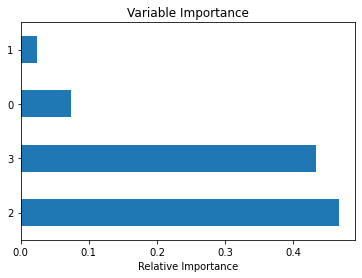

In [36]:
#plot graph of feature importance for better visualization
feat_importances = pd.Series(rf1.feature_importances_,index = pd.DataFrame(iris.data).columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.title('Variable Importance')
plt.xlabel('Relative Importance')
plt.show()